In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow

# If using Jupyter Notebook, add this line (remove it if running as a script)
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [9]:
heartData = pd.read_csv("heart.csv")

In [10]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
heartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
missing_data= heartData.isnull() .sum()
total_percentage = (missing_data.sum()/heartData.shape[0]) * 100
print(f'Total percentage of missing data is {round(total_percentage, 2)}%')
duplicate=heartData[heartData.duplicated ()]
print ("Duplicate rows:")
duplicate
#drop duplicate rows
heartData=heartData.drop_duplicates()

Total percentage of missing data is 0.0%
Duplicate rows:


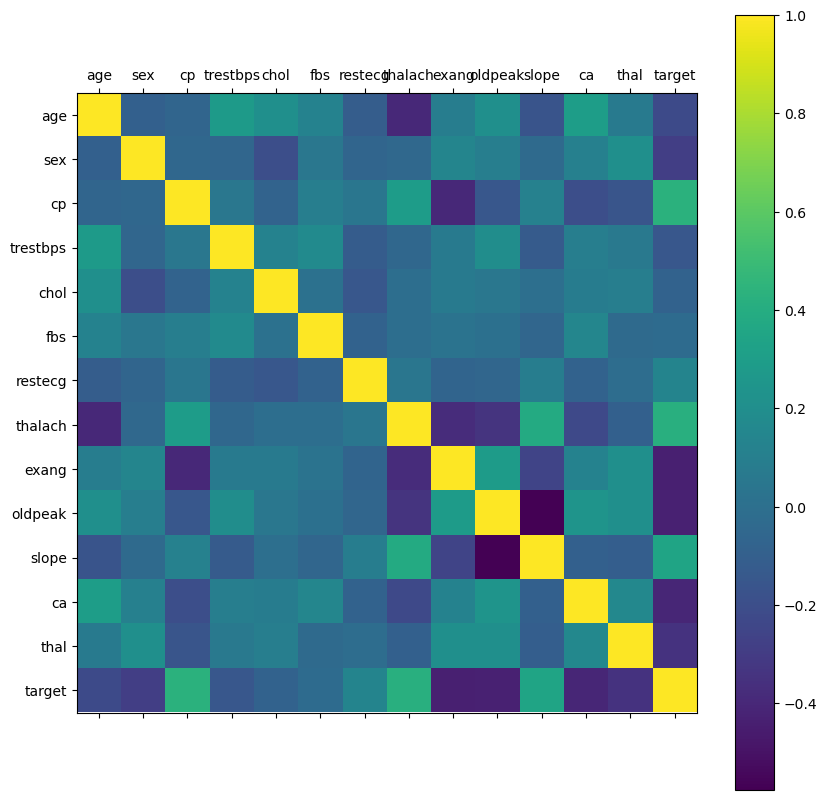

In [14]:
# Set figure size properly
rcParams['figure.figsize'] = (10, 10)

plt.matshow(heartData.corr())
plt.yticks(np.arange(heartData.shape[1]), heartData.columns)
plt.xticks(np.arange(heartData.shape[1]), heartData.columns)
plt.colorbar()
plt.show()


In [15]:
corr = heartData.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [5]:
# Assuming the column name actually has a leading space as in your code:
X = heartData.drop(['target'], axis=1)
y = heartData['target']  # Note the space here

# Split data (note the variable names case consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("XTrain->", X_train.shape[0], 
      "XTest->", X_test.shape[0], 
      "YTrain->", y_train.shape[0], 
      "YTest->", y_test.shape[0])


NameError: name 'heartData' is not defined

### KNN

In [27]:
knn_scores = []
for k in range(2, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train.values, y_train.values)
    knn_score = round(knn_classifier.score(X_test.values, y_test.values), 2)
    knn_scores.append(knn_score)

# Train final model with k=5 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train.values, y_train.values)

# Predict on test set
y_pred = knn_classifier.predict(X_test.values)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.49      0.54        45
           1       0.58      0.70      0.63        46

    accuracy                           0.59        91
   macro avg       0.60      0.59      0.59        91
weighted avg       0.60      0.59      0.59        91



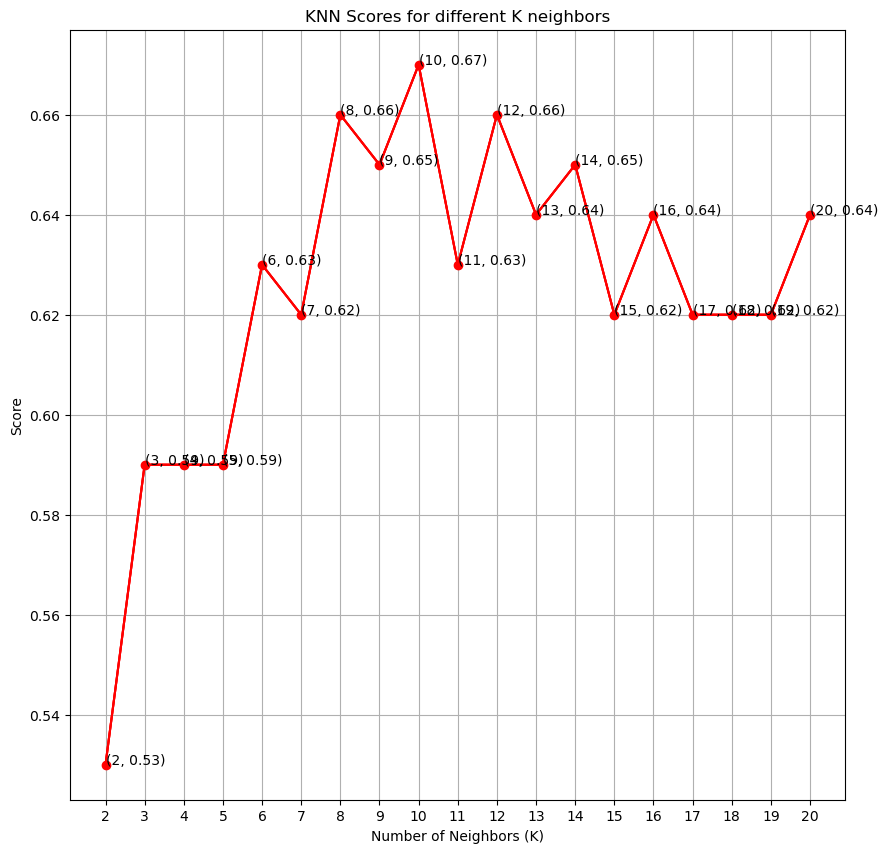

In [34]:
plt.plot([k for k in range(2, 21)], knn_scores, color='red', marker='o')

for i in range(2, 21):  # Fixed 'mange' to 'range'
    plt.text(i, knn_scores[i-2], f"({i}, {knn_scores[i-2]})")  # Fixed variable name and formatting

plt.xticks([i for i in range(2, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')  # Changed second xlabel to ylabel
plt.title('KNN Scores for different K neighbors')
plt.grid(True)
plt.show()


In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(X_train.values, y_train.values)  # fixed missing dot
    score = round(svc_classifier.score(X_test.values, y_test.values), 2)  # fixed dash to dot
    svc_scores.append(score)

# Using the first kernel 'linear' to train final model
svc_classifier = SVC(kernel=kernels[0])
svc_classifier.fit(X_train.values, y_train.values)
svc_prediction_result = svc_classifier.predict(X_test.values)

print(accuracy_score(y_test.values, svc_prediction_result))


0.8241758241758241


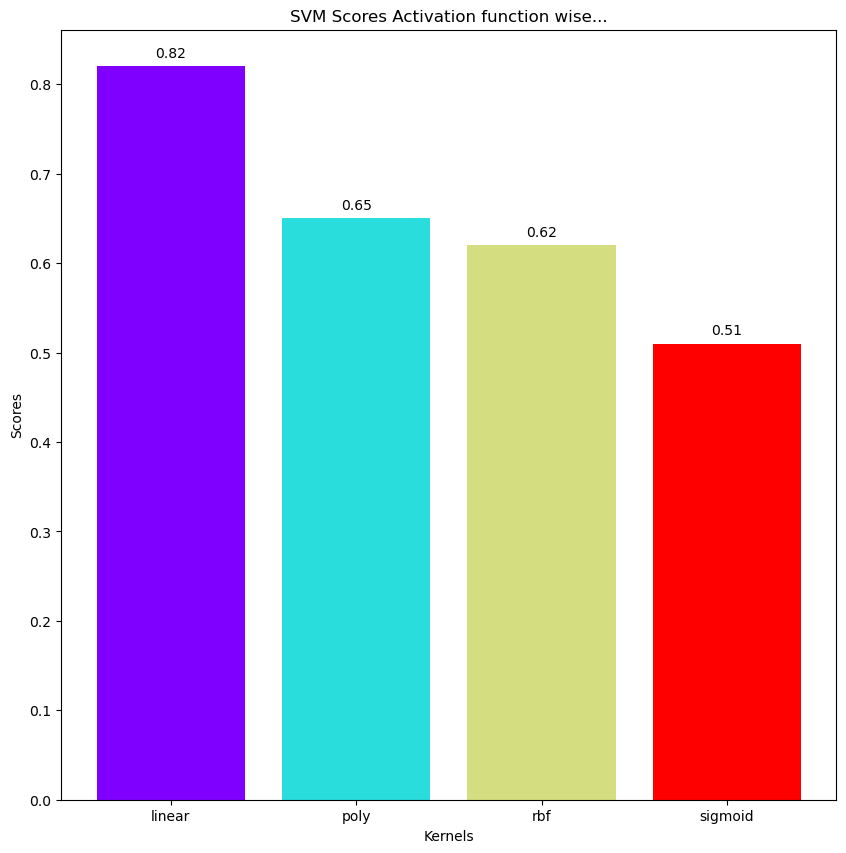

In [46]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color=colors)

for i in range(len(kernels)):
    plt.text(i, svc_scores[i] + 0.01, str(svc_scores[i]), ha='center')  # add a little offset for better visibility

plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVM Scores Activation function wise...')
#plt.ylim(0, 1.1)  # assuming scores between 0 and 1
plt.show()

### Decision Tree

In [48]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier (max_features = i, random_state = 0)
    dt_classifier.fit(X_train.values, y_train.values)
    dt_scores .append(round(dt_classifier.score(X_test.values, y_test.values),2))
print ("Done")

Done


In [50]:
print(dt_scores)

[0.67, 0.7, 0.79, 0.78, 0.79, 0.76, 0.76, 0.84, 0.73, 0.77, 0.76, 0.73, 0.74]


In [51]:
dt_classifier = DecisionTreeClassifier(max_features = 13, random_state = 0)
dt_classifier.fit(X_train.values, y_train.values)

DecisionTreeClassifier(max_features=13, random_state=0)

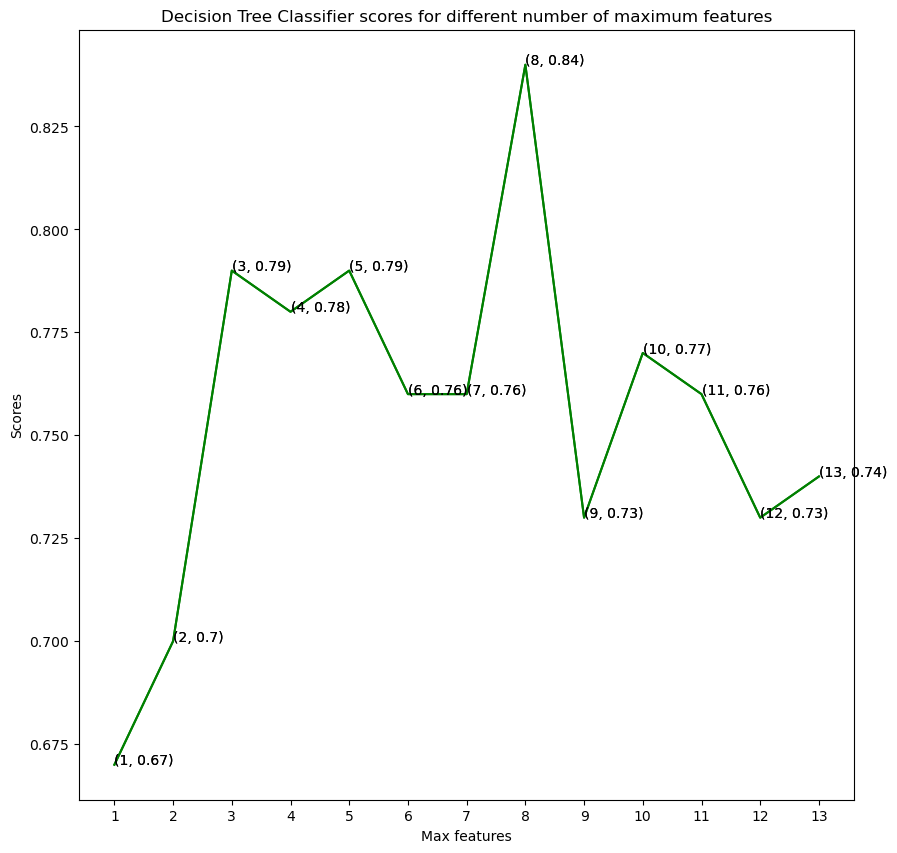

In [57]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores [i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel( 'Max features') 
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
plt.show()

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_scores = []
estimators = [10, 20, 100, 200, 500]

for n in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=0)
    rf_classifier.fit(X_train.values, y_train.values)
    score = round(rf_classifier.score(X_test.values, y_test.values), 2)
    rf_scores.append(score)


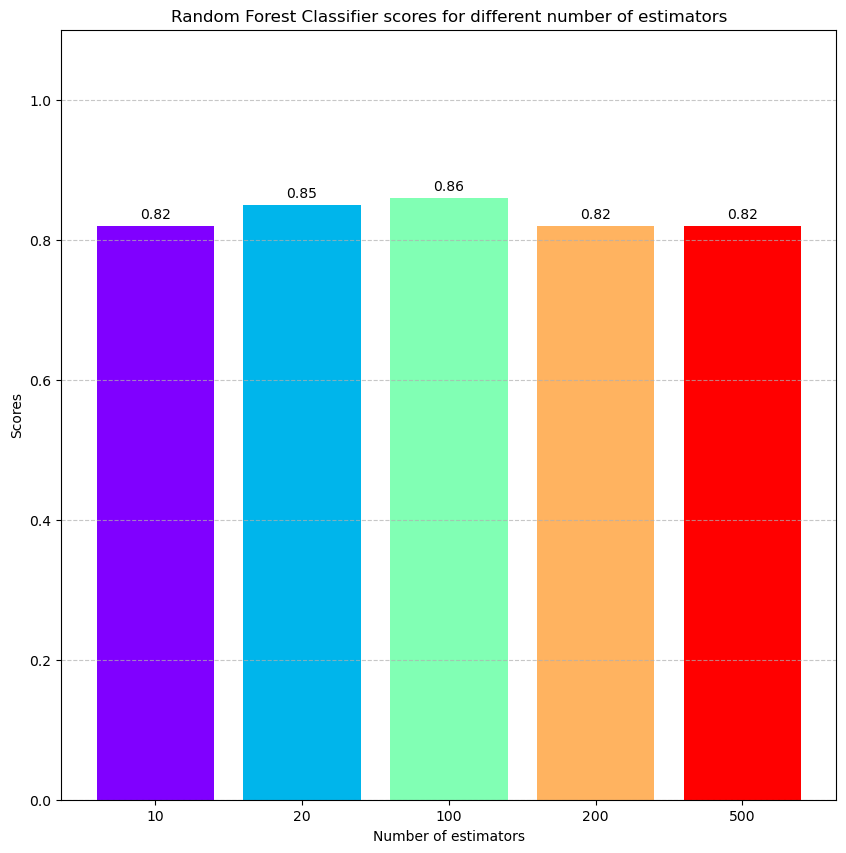

In [63]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color=colors, width=0.8)

for i in range(len(estimators)):
    plt.text(i, rf_scores[i] + 0.01, str(rf_scores[i]), ha='center')  # small offset for text visibility

plt.xticks(ticks=[i for i in range(len(estimators))], labels=[str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
plt.ylim(0, 1.1)  # assuming scores between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Logistic Regression

In [69]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train.values, y_train.values)  # y_train (not Y_train) — case sensitive
logistic_model_prediction = logistic_model.predict(X_test.values)

print(accuracy_score(y_test.values, logistic_model_prediction))
print(classification_report(y_test.values, logistic_model_prediction))


0.8131868131868132
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.77      0.89      0.83        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



### Saved Training Model|

In [1]:
import pickle

f_classifier = RandomForestClassifier().fit(X_train, y_train)
logistic_model = LogisticRegression().fit(X_train, y_train)
dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
svc_classifier = SVC().fit(X_train, y_train)
knn_classifier = KNeighborsClassifier().fit(X_train, y_train)

# List of trained models
all_models = [rf_classifier, logistic_model, dt_classifier, svc_classifier, knn_classifier]

# Save all models into a single file using pickle
with open("models.pkl", 'wb') as files:
    pickle.dump(all_models, files)  # Fixed 'aump' → 'dump'

print("Done")


NameError: name 'rf_classifier' is not defined

In [82]:
open_file = open("models.pkl", "rb")
loaded_list = pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")


[RandomForestClassifier(n_estimators=500, random_state=0), LogisticRegression(), DecisionTreeClassifier(max_features=13, random_state=0), SVC(kernel='linear'), KNeighborsClassifier()]
Done
